Import needed libraries.

- BeautifulSoup is used for web scrapping purposes

- requests, urllib, and ssl are used for making api request

- json used to deal with json format

- pandas used for dealing with data and exporting


In [1]:
from bs4 import BeautifulSoup
import requests, urllib, ssl, json
import pandas as pd

ModuleNotFoundError: No module named 'requests'

In [2]:
api_req_url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&retmode=json&retmax=100&sort=relevance&term="
keyword = "KEYWORD"

In [3]:
keyword = str(input("Enter the keyword required: \n"))
api_req_url = api_req_url + keyword

Enter the keyword required: 
immport


Uses PUBMED API to get all the articles returned from the simple keyword search

In [ ]:
_create_unverified_https_context = ssl._create_unverified_context
request = urllib.request.urlopen(api_req_url).read()

data = json.loads(request)

article_ids = data['esearchresult']['idlist']
len(article_ids)

retrieve_citations gets all the papers that have cited current paper.

find_citations returns all the ids of papers that a certain paper cites.

All ids are PMIDs

In [9]:
def retrieve_citations(id_str):
    api_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id="  
    api_url = api_url + id_str
    ##print(api_url)
    
    _create_unverified_https_context = ssl._create_unverified_context
    response = requests.get(api_url)
    
    soup_object = BeautifulSoup(response.content, "xml")
    
    linked_id_list = []
    
    link_list = soup_object.find_all("Link")
    for link in link_list:
        if "Id" in str(link):
            text = link.text.replace("\n", "")
            linked_id_list.append(text)
    print(linked_id_list)
    return linked_id_list
##this finds all the articles one has cited 
def find_citations(id_str):
    api_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_refs&id="
    api_url = api_url + id_str
    ##print(api_url)
    
    _create_unverified_https_context = ssl._create_unverified_context
    response = requests.get(api_url)
    
    soup_object = BeautifulSoup(response.content, "xml")
    
    linked_id_list = []
    
    link_list = soup_object.find_all("Link")
    for link in link_list:
        if "Id" in str(link):
            text = link.text.replace("\n", "")
            linked_id_list.append(text)
    print(linked_id_list)
    return linked_id_list


Just two examples of the method being used.

In [10]:
find_citations("32283555")

['30357391', '29761457', '29485622', '28365732', '27128319', '26467479', '25348409', '18940862', '15760272', '824647']


['30357391',
 '29761457',
 '29485622',
 '28365732',
 '27128319',
 '26467479',
 '25348409',
 '18940862',
 '15760272',
 '824647']

In [11]:
retrieve_citations("24791905")

['33014809', '33013820', '33005178', '32994819', '32989393', '32983989', '32974146', '32950055', '32884943', '32879664', '32873319', '32854645', '32850416', '32850407', '32793281', '32789283', '32717640', '32699529', '32666718', '32624696', '32588760', '32569190', '32564470', '32537435', '32411773', '32411181', '32355728', '32352015', '32351547', '32322240', '32309184', '32296685', '32296631', '32291385', '32286381', '32219223', '32191631', '32179831', '32158466', '32143735', '32117435', '32081859', '32046766', '32039832', '32028264', '32019546', '32004409', '32002550', '31929113', '31892734', '31865910', '31842801', '31824866', '31821170', '31741756', '31695415', '31633216', '31416125', '31414702', '31371577', '31277152', '31143520', '30945466', '30852461', '30832680', '30661062', '30622534', '30594555', '30516029', '30398470', '30357391', '30304689', '30169745', '30153793', '30067990', '29921729', '29912209', '29769441', '29688354', '29490162', '29485622', '29346583', '29325141', '29

['33014809',
 '33013820',
 '33005178',
 '32994819',
 '32989393',
 '32983989',
 '32974146',
 '32950055',
 '32884943',
 '32879664',
 '32873319',
 '32854645',
 '32850416',
 '32850407',
 '32793281',
 '32789283',
 '32717640',
 '32699529',
 '32666718',
 '32624696',
 '32588760',
 '32569190',
 '32564470',
 '32537435',
 '32411773',
 '32411181',
 '32355728',
 '32352015',
 '32351547',
 '32322240',
 '32309184',
 '32296685',
 '32296631',
 '32291385',
 '32286381',
 '32219223',
 '32191631',
 '32179831',
 '32158466',
 '32143735',
 '32117435',
 '32081859',
 '32046766',
 '32039832',
 '32028264',
 '32019546',
 '32004409',
 '32002550',
 '31929113',
 '31892734',
 '31865910',
 '31842801',
 '31824866',
 '31821170',
 '31741756',
 '31695415',
 '31633216',
 '31416125',
 '31414702',
 '31371577',
 '31277152',
 '31143520',
 '30945466',
 '30852461',
 '30832680',
 '30661062',
 '30622534',
 '30594555',
 '30516029',
 '30398470',
 '30357391',
 '30304689',
 '30169745',
 '30153793',
 '30067990',
 '29921729',
 '29912209',

Takes all the initial articles at that were found in the beginning and stores the ids of all their references in a dictionary.

In [ ]:
main_dict = {}
for id_str in article_ids:
    citation_list = find_citations(id_str)
    print(id_str)
    main_dict[str(id_str)] = citation_list
    ##retrieve_citations("24791905")
    
print(main_dict)

Sometimes due to the format of the article the API does not return references so this is just an indicator of that.

In [ ]:
not_citing = []
for article in main_dict:
    cited = False
    for cited in main_dict[article]:
        if(cited == "24791905" or cited == "29485622"):
            cited = True
    if(not cited):
        print(article)
        not_citing.append(article)   
        
len(not_citing)

Stores reference dictionary into json file. 

In [ ]:
with open('references.txt', 'w') as json_file:
  json.dump(main_dict, json_file)

Converts the ids into api url calls, which are then stored to use javascript in the Zotero console to extract the full text pdfs. 

Note the current code calls on retrieve citations since study was done with all the articles that cited "ImmPort: disseminating data to the public for the future of immunology." 

However the method call can be changed if the approach of studying from the citations of the articles that come up from the key word search is desired 

In [ ]:
def makeURLS(article_ids):
    global_string = ""
    count = 0
    for id_str in article_ids:
        if not count == (len(article_ids) - 1):
            global_string = global_string + "https://pubmed.ncbi.nlm.nih.gov/" + id_str + "/" + "\n"
        else:
           global_string = global_string + "https://pubmed.ncbi.nlm.nih.gov/" + id_str + "/"
        count = count + 1
    return global_string

In [ ]:
reference_urls = open("test_id.txt","w+")
reference_urls.write(makeURLS(retrieve_citations("24791905")))
reference_urls.close()

Now after the full texts have been stored on the computer, they can be parsed to do analysis. In this notebook, only the OCR is used to extract text. Other notebooks in the repository contain the use of other methods (which are faster but less accurate) 

If for whatever reason they want to be seen please look at LargeScrape.ipynb and PDFScraper.ipynb


Additional imports

In [2]:
import pytesseract as pt
import pdf2image
import os
import glob
import math
import PyPDF2

Creates all the directory names given the starting directory of the area with the PDFs

In [3]:
def find_paths(start_file):
    directory_list = []
    directory = start_file
    for filename in os.listdir(directory):
        if filename.endswith(".pdf"):
            print(os.path.join(directory, filename))
            directory_list.append(directory+"\\"+filename)
            print(directory_list)
    return directory_list

In [4]:
directories = find_paths("C:\\Users\\Tejas\\Desktop\\UCSF Internship\\UCSF-Internship\\WordFinder\\NewPDFs")

C:\Users\Tejas\Desktop\UCSF Internship\UCSF-Internship\WordFinder\NewPDFs\Andronis et al. - 2020 - Molecular basis of mood and cognitive adverse even.pdf
['C:\\Users\\Tejas\\Desktop\\UCSF Internship\\UCSF-Internship\\WordFinder\\NewPDFs\\Andronis et al. - 2020 - Molecular basis of mood and cognitive adverse even.pdf']
C:\Users\Tejas\Desktop\UCSF Internship\UCSF-Internship\WordFinder\NewPDFs\Bongen et al. - 2019 - Sex Differences in the Blood Transcriptome Identif.pdf
['C:\\Users\\Tejas\\Desktop\\UCSF Internship\\UCSF-Internship\\WordFinder\\NewPDFs\\Andronis et al. - 2020 - Molecular basis of mood and cognitive adverse even.pdf', 'C:\\Users\\Tejas\\Desktop\\UCSF Internship\\UCSF-Internship\\WordFinder\\NewPDFs\\Bongen et al. - 2019 - Sex Differences in the Blood Transcriptome Identif.pdf']
C:\Users\Tejas\Desktop\UCSF Internship\UCSF-Internship\WordFinder\NewPDFs\Chakladar et al. - 2019 - Papillary Thyroid Carcinoma Variants are Character.pdf
['C:\\Users\\Tejas\\Desktop\\UCSF Internship

getText uses Teseract, which uses OCR, converting each page into an image before extracting text using OCR.

getPaths returns the list of article PDFs.

In [5]:
def getText(pdf):
    try:
        full_text = ""
        pages = pdf2image.convert_from_path(pdf_path=pdf, dpi=200, size=(1654,2340))   
        for i in range(len(pages)):
            pages[i].save('Images\\imagenum' + str(i) + '.jpg')
         
        print(str(len(pages))) 
        print("\n")
     
        for i in range(len(pages)):
            content = pt.image_to_string(pages[i], lang='eng')
            print(content)
            full_text = full_text + " " + content
        return full_text
    except Exception:
        return "Text For This File Could Not be Read"

def getPaths(start_file):
    path_list = []
    directory = start_file
    
    for filename in os.listdir(directory):
         if filename.endswith(".pdf"):
            path_list.append(filename)
    
    return path_list
    

getTextO is the original method to extract text using PyPDF, it is less accurate but faster.

In [6]:
def getTextO(pdf):
    try:
        pdf_document = PyPDF2.PdfFileReader(mypdf)
        full_text = ""
        pages = pdf_document.numPages
        print(pdf_document.numPages) 
        print("\n")
    
        for num in range(0, pages):
            nth_page = pdf_document.getPage(num)
        ##print(nth_page.extractText())
        ##print("\n")
        ##print("PAGE: " + str(num))
        ##print(nth_page.getContents())
        ##print("\n")
        ##print("PAGE: " + str(num))
            full_text = full_text + nth_page.extractText()
        return full_text
    except Exception:
        return "Text For This File Could Not be Read"

Enter path to start extracting text.

In [7]:
fulltext = {}
count = 0

file_names = getPaths("C:\\Users\\Tejas\\Desktop\\UCSF Internship\\UCSF-Internship\\WordFinder\\NewPDFs")
for directory in directories:
    mypdf = open(directory, mode='rb')
    print("Document number " + str(count) + " out of " + str(len(filenames)))
    fulltext[file_names[count]] = getTextO(mypdf)
    count = count + 1

Document number 0 out of 109
17




Document number 1 out of 109
18


Document number 2 out of 109
18


Document number 3 out of 109
14


Document number 4 out of 109
10


Document number 5 out of 109
12


Document number 6 out of 109
14


Document number 7 out of 109
Document number 8 out of 109
19


Document number 9 out of 109
19


Document number 10 out of 109
Document number 11 out of 109
13


Document number 12 out of 109
16


Document number 13 out of 109
8


Document number 14 out of 109
18


Document number 15 out of 109
18


Document number 16 out of 109
13


Document number 17 out of 109
9


Document number 18 out of 109
11


Document number 19 out of 109
21


Document number 20 out of 109
13


Document number 21 out of 109
26


Document number 22 out of 109
Document number 23 out of 109
15


Document number 24 out of 109
14


Document number 25 out of 109
13


Document number 26 out of 109
13


Document number 27 out of 109
16


Document number 28 out of 109
21


Document number 29 out of 109
6


Document num

After all of the articles are extracted using the rough PyPDF library, checkwordsize makes sure to assure quality, resorting to the OCR use if the quality is not met since text in the PyPDF method is not tokenized

However, the step above can be skiped and the useOCR method can be the only method if enough processing power is available.


In [17]:
from textblob import TextBlob 
def checkwordsize(word_list):
    word_split_proper = True
    for word in word_list:
        if len(word) > 50:
            word_split_proper = False
            break
    return word_split_proper

In [24]:
def useOCR(article):
    directory_name = "C:\\Users\\Tejas\\Desktop\\UCSF Internship\\UCSF-Internship\\WordFinder\\NewPDFs\\" + article
    try:
        pages = pdf2image.convert_from_path(pdf_path=directory_name, dpi=200, size=(1654,2340))
        full_text = ""
        for i in range(len(pages)):
            pages[i].save('Images\\imagenum' + str(i) + '.jpg')
        for i in range(len(pages)):
            content = pt.image_to_string(pages[i], lang='eng')
            full_text = full_text + " " + content
        return full_text
    except Exception:
        return "BAD"

Does what was described in the above documentation.

In [29]:
article_words = {}
for article in fulltext:
    article_text = TextBlob(fulltext[article])
    article_text = article_text.lower()
    ##print(article_text.words)
    allow = checkwordsize(article_text.words)
    allow = False
    if allow:
        article_words[article] = article_text.words
    else:
        print("Using OCR for " + article)
        article_words[article] = TextBlob(useOCR(article)).words
    print("Finished article " + article)

Using OCR for Andronis et al. - 2020 - Molecular basis of mood and cognitive adverse even.pdf
Finished article Andronis et al. - 2020 - Molecular basis of mood and cognitive adverse even.pdf
Using OCR for Bongen et al. - 2019 - Sex Differences in the Blood Transcriptome Identif.pdf
Finished article Bongen et al. - 2019 - Sex Differences in the Blood Transcriptome Identif.pdf
Using OCR for Chakladar et al. - 2019 - Papillary Thyroid Carcinoma Variants are Character.pdf
Finished article Chakladar et al. - 2019 - Papillary Thyroid Carcinoma Variants are Character.pdf
Using OCR for Chen et al. - 2019 - Assessment of Postdonation Outcomes in US Living K.pdf
Finished article Chen et al. - 2019 - Assessment of Postdonation Outcomes in US Living K.pdf
Using OCR for Chen et al. - 2020 - Construction of a Prognostic Immune Signature for .pdf
Finished article Chen et al. - 2020 - Construction of a Prognostic Immune Signature for .pdf
Using OCR for Chen et al. - 2020 - Molecular subtyping of gliob

Finished article Wong et al. - 2019 - Prototype of running clinical trials in an untrust.pdf
Using OCR for Xu et al. - 2020 - Eight immune-related genes predict survival outcom.pdf
Finished article Xu et al. - 2020 - Eight immune-related genes predict survival outcom.pdf
Using OCR for Yin et al. - 2020 - Development and Validation of a Tumor Mutation Bur.pdf
Finished article Yin et al. - 2020 - Development and Validation of a Tumor Mutation Bur.pdf
Using OCR for Zhang et al. - 2019 - An Immune-Related Signature Predicts Survival in P.pdf
Finished article Zhang et al. - 2019 - An Immune-Related Signature Predicts Survival in P.pdf
Using OCR for Zhang et al. - 2020 - Construction of an Immunogenomic Risk Score for Pr.pdf
Finished article Zhang et al. - 2020 - Construction of an Immunogenomic Risk Score for Pr.pdf
Using OCR for Zhong et al. - 2020 - Identification of 12 immune-related lncRNAs and mo.pdf
Finished article Zhong et al. - 2020 - Identification of 12 immune-related lncRNAs and

In [30]:
import json
with open('fulltextinwordsOCRNUMBER2.json', 'w') as json_file:
  json.dump(article_words, json_file)

Main methods to try to find extract the relationship of immport

Each article is searched for the keyword "immport." Once immport is found, another method is called to find and store the 30 words before and after it (this delta can be changed). Finally those 30 words before and after are saved in another dictionary to be analyzed later and find the exact usage of immport.

In [31]:
def print_sentence(min, max, word_list):
    local = min
    print_string = ""
    
    while local <= max:
        print_string = print_string + word_list[local] + " "
        local = local + 1
    
    print(print_string)
    return print_string

def search_one_article(test):

    use_list = []
    count = 0
    use_count = 0

    keyword = "immport"

    for count in range(len(test)):
        if test[count].lower() == keyword:
           ## print("found " + keyword)
            use_count = use_count + 1
            ##print("Use number: " + str(use_count) + "\n")
            use_list.append(print_sentence(max(0, count - 30), min(len(test) - 1, count + 30), test))
            ##print("\n")
            count = count + 60
        else:
            count = count + 1
            
    return use_list

def visualize_use(min, max, word_list, freq_dict):
    local = min
    
    while local <= max:
        if freq_dict.get(word_list[local]):
            freq_dict[word_list[local]] = freq_dict.get(word_list[local]) + 1
        else:
            freq_dict[word_list[local]] = 1
        local = local + 1
    
    return freq_dict


def find_freqs(test):
    
    global_freq = {}
    count = 0
    keyword = "immport"
    
    for count in range(len(test)):
        if test[count].lower() == keyword:
            global_freq = visualize_use(max(0, count - 30), min(len(test) - 1, count + 30), test, global_freq)
            count = count + 60
        else:
            count = count + 1
            
    return global_freq

Finds the actual sentences and stores them into a dictionary

In [32]:
uses_of_keyword = {}

for key in article_words:
    current = article_words[key]
    use_list = search_one_article(current)
    print(use_list)
    print("\n")
    print("\n")
    print("\n")    
    uses_of_keyword[key] = use_list

available databases a InnateDB Breuer et al 2013 developed by the Department of Molecu lar Biology and Biochemistry Simon Fraser University Canada and b The Immunology Database and Analysis Portal ImmPort developed by the National Institutes of Health NIH National Institute of Allergy and Infec tious Diseases NIAID Division of Allergy Immunol ogy and Transplantation DAIT Bhattacharya et al 2018 FAERS 
MCAEs was manually curated by subject experts Identification of CPEs associated with immune system-related MoA Identification of CPEs associated with an immune function response was performed by querying InnateDB and ImmPort databases for all immune system-related genes followed by their mapping in the “ Interacting Genes ” list taken from DGldb Further manual curation of the CPEs encoded by those genes 
from DGldb Further manual curation of the CPEs encoded by those genes as well as cross-referencing of CPEs listed in Online Resource 2 that were not retrieved by InnateDB or ImmPort was p

of otitis externa are available an enrichment of mRNA targets that encode for immunologically relevant genes was performed comparing the target genes obtained from miRWalk with the Gene List of ImmPort 46 The predicted mRNA targets of up regulated miRNAs were 270 164 at 3 ’ untranslated region UTR 21 at 5 UTR and 85 at codon sequence CDS of which 
evaluation as potential biomarkers for non-invasive diagnosis in vaginal fluid Sci Rep 2019 9:1945 doi 10.1038/s41598-018-38365-x Bhattacharya S Dunn P Thomas CG Smith B Schaefer H Chen J et al ImmPort toward repurposing of open access immunological assay data for translational and clinical research Sci Data 2018 5:180015 doi 10.1038/sdata.2018.15 Cheng Z Qiu S Jiang L Zhang A Bao W Liu 
['of otitis externa are available an enrichment of mRNA targets that encode for immunologically relevant genes was performed comparing the target genes obtained from miRWalk with the Gene List of ImmPort 46 The predicted mRNA targets of up regulated miRNAs we

of automated literature interrogation to infer biology from microarray analysis BMC Genomics 2007 18 8 461 Bhattacharya S Dunn P Thomas CG Smith B Schaefer H Chen J et al ImmPort toward repurposing of open access immunological assay data for translational and clinical research Sci Data 2018 27 5 180015 Rinchai D Altman MB Konza O Hassler S Martina F Toufiq 
['by manual curation The curators prioritized the transcripts for which the associations could be confirmed based on importance and robustness Immunological relevance Lists of immunologically relevant genes were retrieved from Immport the NIAID Immunology Database and Analysis Portal 17 and were used along with Rinchai et al J Trans Med 2020 18:291 membership to IPA pathways Ingenuity Pathway Analy sis QIAGEN ', 'of automated literature interrogation to infer biology from microarray analysis BMC Genomics 2007 18 8 461 Bhattacharya S Dunn P Thomas CG Smith B Schaefer H Chen J et al ImmPort toward repurposing of open access immunologi

Creates a dictionary of frequencies of each word that is near the use of the word immport.

In [33]:
global_freq_list = {}

for key in article_words:
    current = article_words[key]
    ##print(current)
    one_freq_list = find_freqs(current)
    print(one_freq_list)
    print("\n")
    print("\n")
    print("\n")    
    global_freq_list[key] = one_freq_list

{'available': 1, 'databases': 3, 'a': 2, 'InnateDB': 4, 'Breuer': 1, 'et': 3, 'al': 3, '2013': 1, 'developed': 2, 'by': 12, 'the': 11, 'Department': 1, 'of': 19, 'Molecu': 1, 'lar': 1, 'Biology': 1, 'and': 11, 'Biochemistry': 1, 'Simon': 1, 'Fraser': 1, 'University': 1, 'Canada': 1, 'b': 1, 'The': 3, 'Immunology': 1, 'Database': 1, 'Analysis': 2, 'Portal': 1, 'ImmPort': 5, 'National': 2, 'Institutes': 1, 'Health': 1, 'NIH': 1, 'Institute': 1, 'Allergy': 2, 'Infec': 1, 'tious': 1, 'Diseases': 1, 'NIAID': 1, 'Division': 1, 'Immunol': 1, 'ogy': 1, 'Transplantation': 1, 'DAIT': 1, 'Bhattacharya': 2, '2018': 2, 'FAERS': 1, 'MCAEs': 3, 'was': 3, 'manually': 1, 'curated': 1, 'subject': 1, 'experts': 1, 'Identification': 2, 'CPEs': 9, 'associated': 4, 'with': 6, 'immune': 3, 'system-related': 2, 'MoA': 1, 'an': 3, 'function': 1, 'response': 1, 'performed': 2, 'querying': 1, 'for': 3, 'all': 2, 'genes': 4, 'followed': 1, 'their': 1, 'mapping': 1, 'in': 4, '“': 1, 'Interacting': 1, 'Genes': 1, '



{'patterns': 1, 'which': 1, 'can': 1, 'be': 1, 'a': 1, 'potential': 1, 'tool': 1, 'for': 2, 'immunotherapy': 1, 'prediction': 1, 'MATERIALS': 1, 'AND': 1, 'METHODS': 1, 'Screening': 1, 'DE': 1, 'IRGs': 1, 'Between': 1, 'Primary': 1, 'and': 4, 'Metastatic': 1, 'Melanoma': 1, 'Using': 1, 'the': 3, 'list': 1, 'of': 4, 'immune': 2, 'genes': 1, 'downloaded': 1, 'from': 1, 'ImmPort': 2, 'website': 1, 'Bhattacharya': 2, 'et': 3, 'al': 2, '2018': 2, 'we': 1, 'screened': 1, 'their': 1, 'expression': 1, '‘': 1, 'http': 1, 'www.immport.org': 1, 'data': 3, 'in': 2, 'TCGA': 1, 'SKCM': 1, 'matrix': 1, 'profile': 1, 'during': 1, 'development': 1, 'primary': 1, 'metastatic': 1, 'melanoma': 1, 'A': 3, 'total': 1, 'prognostic': 1, 'predictive': 1, 'markers': 1, 'cancer': 1, 'Curr': 1, 'Opin': 1, 'Immunol': 1, '25': 1, '261-267': 1, 'doi': 1, '10.1016/j.coi.2013.03.004': 1, 'S': 1, 'Dunn': 1, 'P': 1, 'Thomas': 1, 'C': 2, 'G': 2, 'Smith': 1, 'B': 2, 'Schaefer': 1, 'H': 1, 'Chen': 1, 'J': 1, 'toward': 1,

{'Surgery': 1, 'Harbin': 2, 'Medical': 1, 'University': 1, 'Cancer': 1, 'Hospital': 1, 'China': 1, 'We': 1, 'investigated': 1, 'the': 15, 'local': 1, 'immune': 5, 'status': 1, 'and': 24, 'its': 1, 'prognostic': 6, 'value': 2, 'in': 4, 'lung': 9, 'adenocarcinoma': 8, 'In': 3, 'total': 1, '513': 1, 'samples': 3, 'from': 3, 'TCGA': 7, 'ImmPort': 8, 'databases': 4, 'were': 10, 'collected': 1, 'analyzed': 2, 'The': 5, 'R': 3, 'package': 2, 'coxph': 2, 'was': 5, 'employed': 1, 'to': 9, 'mine': 2, 'immune-related': 5, 'genes': 6, 'that': 2, 'significant': 2, 'indicators': 1, 'using': 4, 'both': 1, 'univariate': 2, 'multivariate': 1, 'analyses': 1, 'software': 1, 'which': 3, 'can': 1, 'be': 4, 'ascribed': 1, 'small': 1, 'sample': 2, 'sizes': 1, 'excessive': 1, 'data': 7, 'fitting': 1, 'or': 3, 'inadequate': 1, 'evidence': 1, '5-8': 1, 'currently': 1, 'open': 2, 'available': 1, 'large-scale': 1, 'containing': 1, 'gene': 3, 'expression': 1, 'such': 2, 'as': 4, 'have': 2, 'made': 1, 'it': 1, 'pos

In [34]:
with open('use_by_freq_OCR.json', 'w') as json_file:
  json.dump(global_freq_list, json_file)

Finds and details the exact structured output for each article.

In [76]:
irg_list = []
genes_tracker = []
gene_expression_list = []
secondary_analysis_list = []
gene_analysis_list = []
galaxy_list = []
data_reuse_list = []
cytokine_registry_list = []
hla_list = []
flock_list = []
metacyto_list = []
primary_analysis_list = []
fcs_list = []
rimmport_list = []

def add_to_dict(freq_list, main_dict, article):
    
    cytokine = False
    registry = False
    related = False
    
    irg = False
    ir = False
    data = False
    reuse = False
    immune = False
    
    fcs = False
    fcsTrans = False
    
    flock = False
    
    galaxy = False
    
    gene = False
    expression = False
    list_ = False
    
    hla = False
    
    cyto = False
    meta = False
    metacyto = False
    
    primary = False
    secondary = False
    analysis = False
    
    rimmport = False
    
    at_least_one  = False
    
    immport = False
    
    for word in freq_list:
        if "immune" == word:
            immune = True
            at_least_one  = True
        if "related" == word:
            related = True
            at_least_one  = True
        if "IRG" == word or "IRGs" == word:
            irg = True
            at_least_one  = True
        if "immune-related" == word.lower() or "immune related" == word.lower():
            ir = True
        if "cytokine" in word.lower():
            cytokine = True
            at_least_one  = True
        if "registry" in word.lower():
            registry = True
            at_least_one  = True            
        if "data" in word.lower():
            data = True
            at_least_one  = True
        if "reuse" == word.lower():
            reuse = True
            at_least_one  = True
        if "fcs" in word.lower():
            fcs = True
            at_least_one  = True
        if "fcstrans" in word.lower():
            fcsTrans = True
            at_least_one  = True
        if "flock" in word.lower():
            flock = True
            at_least_one  = True
        if "galaxy" == word.lower():
            galaxy = True
            at_least_one  = True
        if "gene" or "genes" in word.lower():
            gene = True
            at_least_one  = True
        if "list" in word.lower():
            list_ = True
            at_least_one  = True
        if "expression" in word.lower():
            expression = True
            at_least_one  = True
        if "hla" == word.lower():
            hla = True
            at_least_one  = True
        if "cyto" == word.lower():
            cyto = True
            at_least_one  = True
        if "meta" == word.lower():
            meta = True
            at_least_one  = True
        if "metacyto" == word.lower():
            metacyto = True
            at_least_one  = True
        if "primary" == word.lower():
            primary = True
            at_least_one  = True
        if "secondary" == word.lower():
            secondary = True
            at_least_one  = True
        if "analysis" == word.lower() or "analyses" == word.lower() :
            analysis = True
            at_least_one  = True
        if "rimmport" in word.lower():
            rimmport = True
            at_least_one  = True
        if "immport" in word.lower():
            immport = True

    if irg or (ir and gene) or (immune and related and gene):
        if "IRG" in main_dict:
            main_dict["IRG"] = main_dict["IRG"] + 1  
        else:
            main_dict["IRG"] = 1
    if galaxy:
        if "galaxy" in main_dict:
            main_dict["galaxy"] = main_dict["galaxy"] + 1
        else: 
            main_dict["galaxy"] = 1
    if fcsTrans:
        if "fcstrans" in main_dict:
            main_dict["fcstrans"] = main_dict["fcstrans"] + 1
        else: 
            main_dict["fcstrans"] = 1
    if fcs:
        if "fcs" in main_dict:
            main_dict["fcs"] = main_dict["fcs"] + 1
        else: 
            main_dict["fcs"] = 1
    if hla:
        if "hla" in main_dict:
            main_dict["hla"] = main_dict["hla"] + 1
        else: 
            main_dict["hla"] = 1
    if flock:
        if "flock" in main_dict:
            main_dict["flock"] = main_dict["flock"] + 1
        else: 
            main_dict["flock"] = 1
    if rimmport:
        if "rimmport" in main_dict:
            main_dict["rimmport"] = main_dict["rimmport"] + 1
        else: 
            main_dict["rimmport"] = 1
    if metacyto:
        if "metacyto" in main_dict:
            main_dict["metacyto"] = main_dict["metacyto"] + 1
        else: 
            main_dict["metacyto"] = 1
    
    print("DATA FOR ARTICLE " + article + "\n")
    
    at_least_one  = False
        
    if cytokine and registry:
        print("Uses Cytokine Registry\n")
        cytokine_registry_list.append(article)
        if "cytokine_registry" in main_dict:
            main_dict["cytokine_registry"] = main_dict["cytokine_registry"] + 1
        else: 
            main_dict["cytokine_registry"] = 1
        at_least_one  = True
    if data and reuse:
        print("Uses Data Reuse\n")
        data_reuse_list.append(article)
        if "data_reuse" in main_dict:
            main_dict["data_reuse"] = main_dict["data_reuse"] + 1
        else: 
            main_dict["data_reuse"] = 1
        at_least_one  = True
    if fcs or fcsTrans:
        fcs_list.append(article)
        print("Uses FCSTrans\n")
        at_least_one  = True
    if flock:
        flock_list.append(article)
        print("Uses FLOCK\n")
        at_least_one  = True
    if galaxy:
        galaxy_list.append(article)
        print("Uses Galaxy\n")
        at_least_one  = True
    if gene and expression:
        gene_expression_list.append(article)
        print("Uses Gene Expression\n")
        if "gene_expression" in main_dict:
            main_dict["gene_expression"] = main_dict["gene_expression"] + 1
        else: 
            main_dict["gene_expression"] = 1
        at_least_one  = True
    if gene and list_ and immune:
        genes_tracker.append(article)
        print("Uses Gene List\n")
        if "gene_list" in main_dict:
            main_dict["gene_list"] = main_dict["gene_list"] + 1
        else: 
            main_dict["gene_list"] = 1
        at_least_one  = True
    if gene and analysis:
        gene_analysis_list.append(article)
        print("Uses Gene Analysis")
        if "gene_analysis" in main_dict:
            main_dict["gene_analysis"] = main_dict["gene_analysis"] + 1
        else: 
            main_dict["gene_analysis"] = 1
        at_least_one  = True
    if gene:
        print("Uses Gene")
        at_least_one  = True
    if hla:
        hla_list.append(article)
        print("Uses HLA\n")
        at_least_one  = True
    if (cyto and meta) or metacyto:
        metacyto_list.append(article)
        print("Uses MetaCyto\n")
        at_least_one  = True
    if primary and analysis:
        print("Uses Primary Analysis\n")
        primary_analysis_list.append(article)
        if "primary_analysis" in main_dict:
            main_dict["primary_analysis"] = main_dict["primary_analysis"] + 1
        else: 
            main_dict["primary_analysis"] = 1
        at_least_one  = True
    if secondary and analysis:
        secondary_analysis_list.append(article)
        print("Uses Secondary Analysis\n")
        if "secondary_analysis" in main_dict:
            main_dict["secondary_analysis"] = main_dict["secondary_analysis"] + 1
        else: 
            main_dict["secondary_analysis"] = 1
        at_least_one  = True
    if rimmport:
        rimmport_list.append(article)
        print("Uses RImmPort\n")
        at_least_one  = True
    if irg or (ir and gene) or (immune and related and gene):
        irg_list.append(article)
        print("Uses IRGs")
        at_least_one = True
    
    if not at_least_one:
        count = count + 1
    
    return main_dict

usage_indicator_dict = {}
count = 0
for article in global_freq_list:
    usage_indicator_dict = add_to_dict(global_freq_list[article], usage_indicator_dict, article)

print(count)

DATA FOR ARTICLE Andronis et al. - 2020 - Molecular basis of mood and cognitive adverse even.pdf

Uses Gene List

Uses Gene Analysis
Uses Gene
DATA FOR ARTICLE Bongen et al. - 2019 - Sex Differences in the Blood Transcriptome Identif.pdf

Uses Gene Expression

Uses Gene Analysis
Uses Gene
DATA FOR ARTICLE Chakladar et al. - 2019 - Papillary Thyroid Carcinoma Variants are Character.pdf

Uses Gene List

Uses Gene
DATA FOR ARTICLE Chen et al. - 2019 - Assessment of Postdonation Outcomes in US Living K.pdf

Uses Gene Analysis
Uses Gene
Uses Secondary Analysis

DATA FOR ARTICLE Chen et al. - 2020 - Construction of a Prognostic Immune Signature for .pdf

Uses Gene Expression

Uses Gene List

Uses Gene Analysis
Uses Gene
Uses Primary Analysis

Uses IRGs
DATA FOR ARTICLE Chen et al. - 2020 - Molecular subtyping of glioblastoma based on immun.pdf

Uses Gene Analysis
Uses Gene
Uses IRGs
DATA FOR ARTICLE Chen et al. - 2020 - Prediction and identification of immune genes rela.pdf

Uses Gene Expres

Gives the exact number of uses for each of the structured output

Here is a sample output:
    
 {'gene_list': 30,
 'gene_analysis': 54,
 'secondary_analysis': 6,
 'gene_expression': 35,
 'galaxy': 2,
 'hla': 3,
 'flock': 4,
 'rimmport': 4,
 'metacyto': 4,
 'cytokine_registry': 2,
 'data_reuse': 7,
 'primary_analysis': 7,
 'IRG': 32,
 'fcs': 4}  

In [77]:
usage_indicator_dict

{'gene_list': 14,
 'gene_analysis': 31,
 'gene_expression': 22,
 'secondary_analysis': 1,
 'IRG': 28,
 'primary_analysis': 1,
 'galaxy': 2,
 'fcs': 1,
 'metacyto': 1,
 'data_reuse': 1}

Creates table and later the visual graph.

In [60]:
import matplotlib
import pandas as pd

keys = usage_indicator_dict.keys()

number = []
key_values = []
for key in keys:
    key_values.append(key)
    number.append(usage_indicator_dict[key])
df = pd.DataFrame({'use_cases': key_values , 'val': number})

Prints table

In [78]:
df

,use_cases,val
0,gene_list,14
1,gene_analysis,29
2,gene_expression,22
3,secondary_analysis,1
4,IRG,28
5,primary_analysis,1
6,galaxy,2
7,fcs,1
8,metacyto,1
9,data_reuse,1


Prints graph

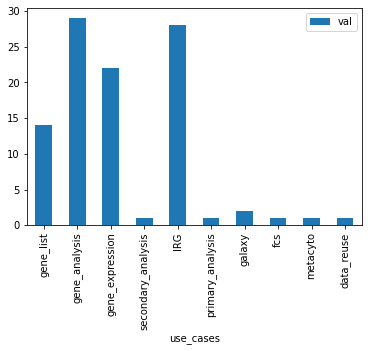

In [79]:
ax = df.plot.bar(x='use_cases', y='val', rot=90)

Validation to check where immport uses were not found in any article

In [80]:
def find_use(freq_list, article):
    
    cytokine = False
    registry = False
    
    irg = False
    
    data = False
    reuse = False
    
    fcs = False
    fcsTrans = False
    
    flock = False
    
    galaxy = False
    
    gene = False
    expression = False
    list_ = False
    
    hla = False
    
    cyto = False
    meta = False
    metacyto = False
    
    primary = False
    secondary = False
    analysis = False
    
    rimmport = False
    immune = False
    at_least_one  = False
    
    immport = False
    
    for word in freq_list:
        if "immune" == word.lower():
            immune = True
        if "immune-related" == word.lower() or "immune related" == word.lower():
            irg = True
        if "irgs" or "irg" == word.lower():
            irg = True
        if "cytokine" in word.lower():
            cytokine = True
        if "registry" in word.lower():
            registry = True          
        if "data" in word.lower():
            data = True
        if "reuse" == word.lower():
            reuse = True
        if "fcs" in word.lower():
            fcs = True
        if "fcstrans" in word.lower():
            fcsTrans = True
        if "flock" in word.lower():
            flock = True
        if "galaxy" == word.lower():
            galaxy = True
        if "gene" or "genes" in word.lower():
            gene = True
        if "list" in word.lower():
            list_ = True
        if "expression" in word.lower():
            expression = True
        if "hla" == word.lower():
            hla = True
        if "cyto" == word.lower():
            cyto = True
        if "meta" == word.lower():
            meta = True
        if "metacyto" == word.lower():
            metacyto = True
        if "primary" == word.lower():
            primary = True
        if "secondary" == word.lower():
            secondary = True
        if "analysis" == word.lower() or "analyses" == word.lower() :
            analysis = True
        if "rimmport" in word.lower():
            rimmport = True
            at_least_one  = True
        if "immport" in word.lower():
            immport = True

    print("DATA FOR ARTICLE " + article + "\n")
    
    at_least_one  = False
        
    if cytokine or registry:
        print("Uses Cytokine Registry\n")
        at_least_one  = True
    if data and reuse:
        print("Uses Data Reuse\n")
        at_least_one  = True
    if fcs or fcsTrans:
        print("Uses FCSTrans\n")
        at_least_one  = True
    if flock:
        print("Uses FLOCK\n")
        at_least_one  = True
    if galaxy:
        print("Uses Galaxy\n")
        at_least_one  = True
    if gene and expression:
        print("Uses Gene Expression\n")
        at_least_one  = True
    if gene and list_ and immune:
        print("Uses Gene List\n")
        at_least_one  = True
    if gene and analysis:
        print("Uses Gene Analysis")
        at_least_one  = True
    if gene:
        print("Uses Gene")
        at_least_one  = True
    if hla:
        print("Uses HLA\n")
        at_least_one  = True
    if (cyto and meta) or metacyto:
        print("Uses MetaCyto\n")
        at_least_one  = True
    if primary and analysis:
        print("Uses Primary Analysis\n")
        at_least_one  = True
    if secondary and analysis:
        print("Uses Secondary Analysis\n")
        at_least_one  = True
    if rimmport:
        print("Uses RImmPort\n")
        at_least_one  = True
    if irg:
        print("uses IRG")
        at_least_one = True
   
    if not at_least_one:
        return 1
    else:
        return 0

In [57]:
count = 0
not_found = []
for article in global_freq_list:
    if find_use(global_freq_list[article], article) == 1:
        print("Not found on " + article)
        not_found.append(article)
        count = count + 1
    
print("Num not found: " + str(count))
print(not_found)

DATA FOR ARTICLE Andronis et al. - 2020 - Molecular basis of mood and cognitive adverse even.pdf

Uses Gene List

Uses Gene Analysis
Uses Gene
uses IRG
DATA FOR ARTICLE Bongen et al. - 2019 - Sex Differences in the Blood Transcriptome Identif.pdf

Uses Gene Expression

Uses Gene Analysis
Uses Gene
uses IRG
DATA FOR ARTICLE Chakladar et al. - 2019 - Papillary Thyroid Carcinoma Variants are Character.pdf

Uses Gene List

Uses Gene
uses IRG
DATA FOR ARTICLE Chen et al. - 2019 - Assessment of Postdonation Outcomes in US Living K.pdf

Uses Cytokine Registry

Uses Gene Analysis
Uses Gene
Uses Secondary Analysis

uses IRG
DATA FOR ARTICLE Chen et al. - 2020 - Construction of a Prognostic Immune Signature for .pdf

Uses Gene Expression

Uses Gene List

Uses Gene Analysis
Uses Gene
Uses Primary Analysis

uses IRG
DATA FOR ARTICLE Chen et al. - 2020 - Molecular subtyping of glioblastoma based on immun.pdf

Uses Gene Analysis
Uses Gene
uses IRG
DATA FOR ARTICLE Chen et al. - 2020 - Prediction and

Final results of all the uses and the articles under them. 

OCRScrape.ipynb also includes more detailed information on some of the specific words and topics of the articles if that is required.

In [62]:
irg_list

['Chen et al. - 2020 - Construction of a Prognostic Immune Signature for .pdf',
 'Chen et al. - 2020 - Molecular subtyping of glioblastoma based on immun.pdf',
 'Chen et al. - 2020 - Prediction and identification of immune genes rela.pdf',
 'Ekiz et al. - 2019 - MicroRNA-155 coordinates the immunological landsca.pdf',
 'Fu et al. - 2020 - Development of an Immune-Related Risk Signature fo.pdf',
 'Guo et al. - 2020 - Identification of the Prognostic Value of Immune-R.pdf',
 'Kang et al. - 2020 - Significance of Tumor Mutation Burden in Immune In.pdf',
 'Li et al. - 2020 - Development of a novel prognostic score combining .pdf',
 'Li et al. - 2020 - Development of an immunogenomic landscape for the .pdf',
 'Li et al. - 2020 - Identification of a Prognostic Model Based on Immu.pdf',
 'Li et al. - 2020 - Identification of an Immune Signature Predicting P.pdf',
 'Lin et al. - 2020 - Development of a prognostic index and screening of.pdf',
 'Liu et al. - 2020 - Identification of an Immune-Re

In [63]:
genes_tracker

['Andronis et al. - 2020 - Molecular basis of mood and cognitive adverse even.pdf',
 'Chakladar et al. - 2019 - Papillary Thyroid Carcinoma Variants are Character.pdf',
 'Chen et al. - 2020 - Construction of a Prognostic Immune Signature for .pdf',
 'Ekiz et al. - 2019 - MicroRNA-155 coordinates the immunological landsca.pdf',
 'Fu et al. - 2020 - Development of an Immune-Related Risk Signature fo.pdf',
 'Guo et al. - 2020 - Identification of the Prognostic Value of Immune-R.pdf',
 'Kang et al. - 2020 - Significance of Tumor Mutation Burden in Immune In.pdf',
 'Li et al. - 2020 - Development of a novel prognostic score combining .pdf',
 'Li et al. - 2020 - Identification of an Immune Signature Predicting P.pdf',
 'Liu et al. - 2020 - Identification of an Immune-Related Prognostic Sig.pdf',
 'Overton et al. - 2019 - Reporting and connecting cell type names and gatin.pdf',
 'Ren et al. - 2020 - Development and Validation of a Clinical Prognosti.pdf',
 'Shi et al. - 2020 - Exploration of 

In [64]:
gene_expression_list

['Bongen et al. - 2019 - Sex Differences in the Blood Transcriptome Identif.pdf',
 'Chen et al. - 2020 - Construction of a Prognostic Immune Signature for .pdf',
 'Chen et al. - 2020 - Prediction and identification of immune genes rela.pdf',
 'Ekiz et al. - 2019 - MicroRNA-155 coordinates the immunological landsca.pdf',
 'Fu et al. - 2020 - Development of an Immune-Related Risk Signature fo.pdf',
 'Guo et al. - 2020 - TOX correlates with prognosis, immune infiltration.pdf',
 'Kang et al. - 2020 - Significance of Tumor Mutation Burden in Immune In.pdf',
 'Li et al. - 2020 - Identification of an Immune Signature Predicting P.pdf',
 'Ling et al. - 2018 - Elucidating the Interaction of CF Airway Epithelia.pdf',
 'Liu et al. - 2019 - Computational approaches for characterizing the tu.pdf',
 'Liu et al. - 2020 - Identification of an Immune-Related Prognostic Sig.pdf',
 'Liu et al. - 2020 - Seven immune-related genes prognostic power and co.pdf',
 'Quan et al. - 2020 - Development of an immun

In [65]:
secondary_analysis_list

['Chen et al. - 2019 - Assessment of Postdonation Outcomes in US Living K.pdf']

In [81]:
gene_analysis_list

['Andronis et al. - 2020 - Molecular basis of mood and cognitive adverse even.pdf',
 'Bongen et al. - 2019 - Sex Differences in the Blood Transcriptome Identif.pdf',
 'Chen et al. - 2019 - Assessment of Postdonation Outcomes in US Living K.pdf',
 'Chen et al. - 2020 - Construction of a Prognostic Immune Signature for .pdf',
 'Chen et al. - 2020 - Molecular subtyping of glioblastoma based on immun.pdf',
 'Dhillon et al. - 2020 - Systems Biology Approaches to Understanding the Hu.pdf',
 'Ekiz et al. - 2019 - MicroRNA-155 coordinates the immunological landsca.pdf',
 'Fu et al. - 2020 - Development of an Immune-Related Risk Signature fo.pdf',
 'Garg et al. - 2020 - Multi-Dimensional Flow Cytometry Analyses Reveal a.pdf',
 'Guo et al. - 2020 - Identification of the Prognostic Value of Immune-R.pdf',
 'Kang et al. - 2020 - Significance of Tumor Mutation Burden in Immune In.pdf',
 'Li et al. - 2020 - Development of a novel prognostic score combining .pdf',
 'Li et al. - 2020 - Development of 

In [67]:
galaxy_list

['Garg et al. - 2020 - Multi-Dimensional Flow Cytometry Analyses Reveal a.pdf',
 'Tay et al. - 2019 - Immunomics in Pediatric Rheumatic Diseases.pdf']

In [68]:
data_reuse_list

['Vita et al. - 2020 - A structured model for immune exposures.pdf']

In [69]:
cytokine_registry_list

[]

In [70]:
hla_list

[]

In [71]:
flock_list

[]

In [72]:
metacyto_list

['Liu et al. - 2019 - Computational approaches for characterizing the tu.pdf']

In [73]:
primary_analysis_list

['Chen et al. - 2020 - Construction of a Prognostic Immune Signature for .pdf']

In [74]:
fcs_list

['Garg et al. - 2020 - Multi-Dimensional Flow Cytometry Analyses Reveal a.pdf']

In [75]:
rimmport_list

[]

In [82]:
import matplotlib
import pandas as pd

keys = usage_indicator_dict.keys()

usage_indicator_dict["cytokine_registry"] = 1
usage_indicator_dict["data_reuse"] = 7
usage_indicator_dict["fcs"] = 5
usage_indicator_dict["flock"] = 3
usage_indicator_dict["galaxy"] = 3
usage_indicator_dict["cytokine_registry"] = 1
usage_indicator_dict["gene_analysis"] = 85
usage_indicator_dict["gene_expression"] = 56
usage_indicator_dict["cytokine_registry"] = 1
usage_indicator_dict["gene_list"] = 31
usage_indicator_dict["hla"] = 2
usage_indicator_dict["IRG"] = 66
usage_indicator_dict["metacyto"] = 4
usage_indicator_dict["primary_analysis"] = 7
usage_indicator_dict["rimmport"] = 3
usage_indicator_dict["secondary_analysis"] = 6

number = []
key_values = []
for key in keys:
    key_values.append(key)
    number.append(usage_indicator_dict[key])
df = pd.DataFrame({'use_cases': key_values , 'val': number})

In [83]:
df

,use_cases,val
0,gene_list,31
1,gene_analysis,85
2,gene_expression,56
3,secondary_analysis,6
4,IRG,66
5,primary_analysis,7
6,galaxy,3
7,fcs,5
8,metacyto,4
9,data_reuse,7


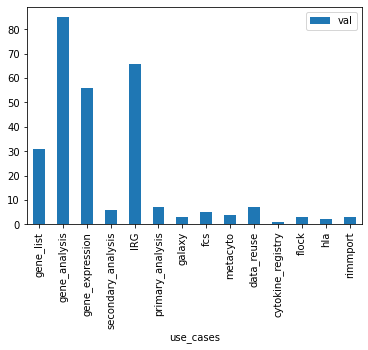

In [84]:
ax = df.plot.bar(x='use_cases', y='val', rot=90)